In [8]:
from keras.models import load_model
from PIL import Image, ImageOps 
import numpy as np

In [11]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

model = load_model(r'./GTM/keras_model.h5', compile=False)
class_names = open(r'./GTM/labels.txt', "r").readlines()

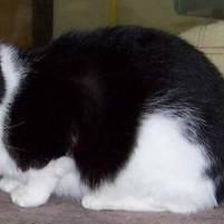

In [18]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open(r'./GTM/Cat.jpg').convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image

In [19]:
# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
normalized_image_array

array([[[-0.5137255 , -0.654902  , -0.84313726],
        [-0.52156866, -0.64705884, -0.84313726],
        [-0.52156866, -0.64705884, -0.84313726],
        ...,
        [-0.54509807, -0.5372549 , -0.58431375],
        [-0.5372549 , -0.5294118 , -0.5764706 ],
        [-0.54509807, -0.5372549 , -0.58431375]],

       [[-0.52156866, -0.6627451 , -0.8509804 ],
        [-0.5294118 , -0.654902  , -0.8509804 ],
        [-0.5294118 , -0.654902  , -0.8509804 ],
        ...,
        [-0.54509807, -0.5372549 , -0.5764706 ],
        [-0.5372549 , -0.5294118 , -0.5764706 ],
        [-0.54509807, -0.5372549 , -0.58431375]],

       [[-0.5372549 , -0.6784314 , -0.8666667 ],
        [-0.5372549 , -0.6627451 , -0.85882354],
        [-0.5372549 , -0.6627451 , -0.85882354],
        ...,
        [-0.5529412 , -0.54509807, -0.6       ],
        [-0.54509807, -0.5372549 , -0.5921569 ],
        [-0.5529412 , -0.54509807, -0.5921569 ]],

       ...,

       [[-0.03529412, -0.12941176, -0.12941176],
        [-0

In [15]:
# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

1/1 [==============================] - 3s 3s/step


In [16]:
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

Class: Cat
Confidence Score: 1.0
